# Dominos Sales Data Analysis from 2015-12-03 to 2015-12-15

In the following code, I Analyzed the following:

1. Quantities of pizzas sold on Each Date
2. Quantities of pizzas  Purchased in Each Branch
3. Total sales for each category
4. Total sales for each pizza sold
5. Total sales for each branch
6. Total sales for each day
7. Managers with the highest Sales
8. How many Quantities were sold on each day per Branch?
9. What type of Pizza was purchased more at each Branch?
10. Total sales for each category in each branch
11. Total sales for each pizza sold in each branch
12. Total sales for each day in each branch


At the end of this notebook are my findings from the analysis done.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

In [2]:
df= pd.read_excel(r'Sales-Data.xlsx',sheet_name='Sales Data')
df.head()

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,08:00:01,Before 9:00am
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,08:00:02,Before 9:00am
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,08:00:04,Before 9:00am
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,08:00:07,Before 9:00am
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,08:00:08,Before 9:00am


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
S/N           5000 non-null int64
Date          5000 non-null datetime64[ns]
Branch        5000 non-null object
Pizza Sold    5000 non-null object
Category      5000 non-null object
Price         5000 non-null int64
Quantity      5000 non-null int64
Time          5000 non-null object
Time Range    5000 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 351.7+ KB


In [4]:
df.columns

Index(['S/N', 'Date', 'Branch', 'Pizza Sold', 'Category', 'Price', 'Quantity',
       'Time', 'Time Range'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=5000, step=1)

In [6]:
df.isnull().values.any()

False

In [7]:
#converting strings to time without date
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')- pd.to_datetime(df['Time'], format='%H:%M:%S').dt.normalize()

In [8]:
#To convert datetime to string
df['Date']=df['Date'].astype('str')

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Creating a new column for sales per entry
df['Sales'] = df['Price'] * df['Quantity']

In [11]:
df.head()

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range,Sales
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,08:00:01,Before 9:00am,10000
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,08:00:02,Before 9:00am,8000
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,08:00:04,Before 9:00am,20000
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,08:00:07,Before 9:00am,2000
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,08:00:08,Before 9:00am,8000


## 1. Quantities of pizza sold on Each Date

In [12]:
quantity_sold_per_day = df.groupby('Date')['Quantity'].sum().reset_index()

Text(0, 0.5, 'Quantities')

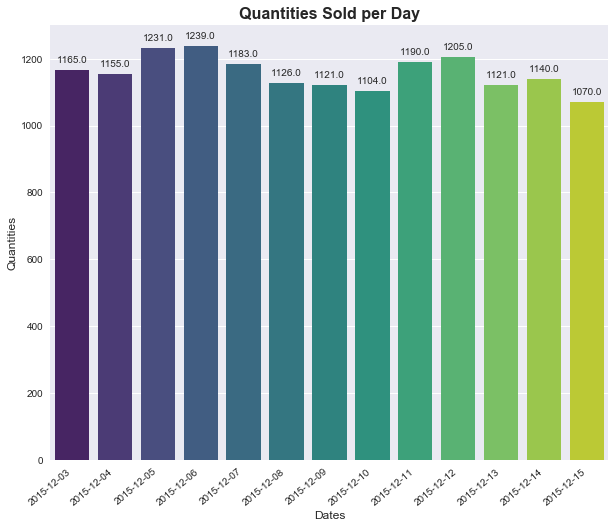

In [13]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=quantity_sold_per_day ['Date'], y=quantity_sold_per_day ['Quantity'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Quantities Sold per Day',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Quantities',fontsize=12)

## 2. Quantities of Pizza Purchased in Each Branch

In [14]:
quantity = df.groupby('Branch')['Quantity'].sum().reset_index()

Text(0, 0.5, 'Quantity')

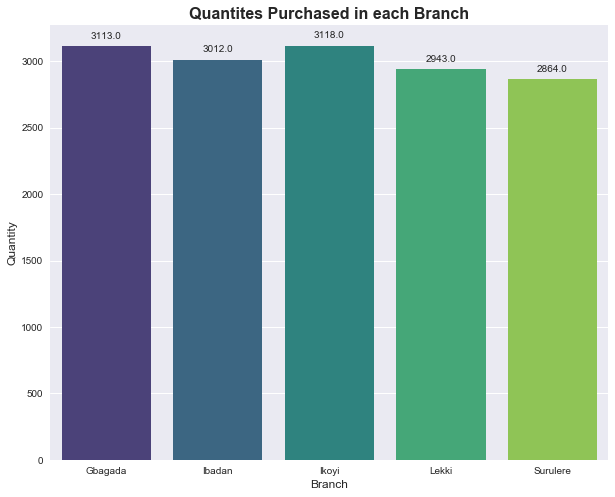

In [15]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=quantity['Branch'],y=quantity['Quantity'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Quantites Purchased in each Branch',fontsize=16,weight='bold')
plt.xlabel('Branch',fontsize=12)
plt.ylabel('Quantity',fontsize=12)

## 3. Total sales for Each Category of Pizza

In [16]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

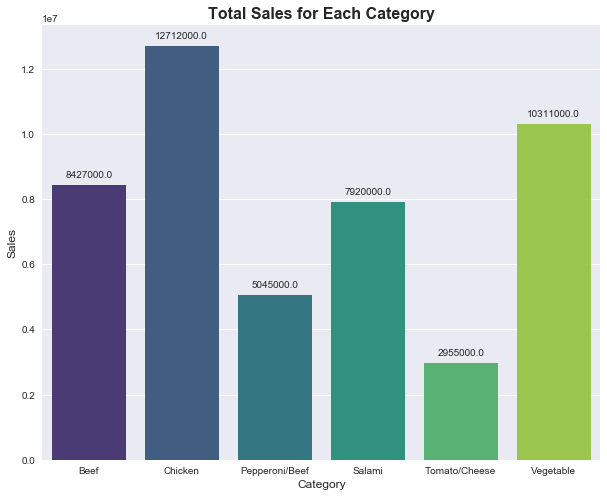

In [17]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=category_sales['Category'],y=category_sales['Sales'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Category',fontsize=16,weight='bold')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Sales',fontsize=12)

## 4. Total sales for Each Pizza Sold

In [18]:
pizza_sales = df.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

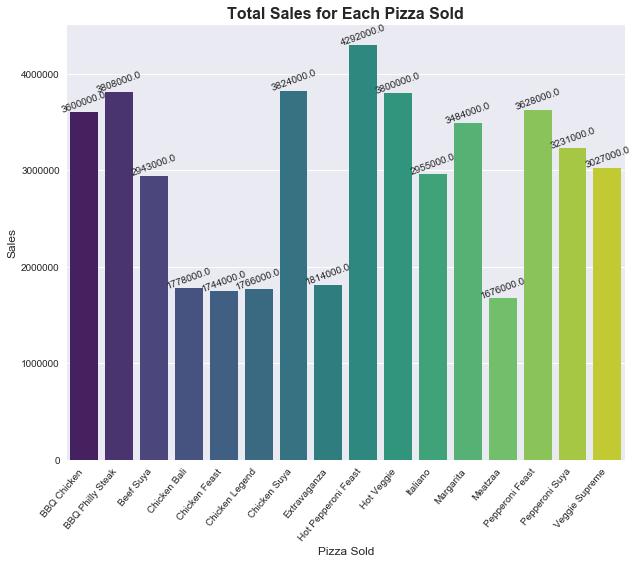

In [19]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=pizza_sales['Pizza Sold'],y=pizza_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=20)
plt.title('Total Sales for Each Pizza Sold',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

## 5. Total sales for Each Branch

In [20]:
branch_sales = df.groupby('Branch')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

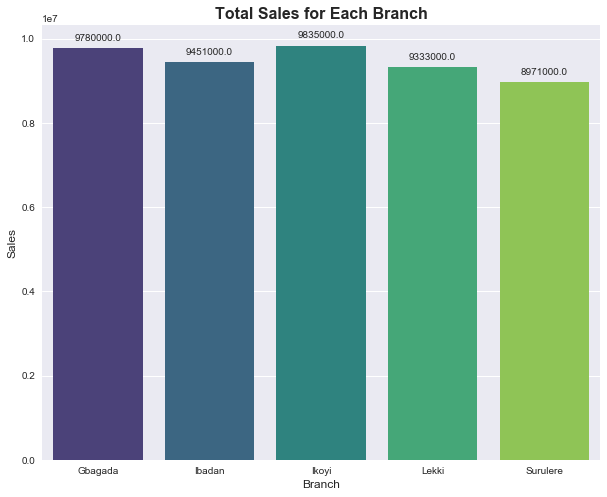

In [21]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=branch_sales['Branch'],y=branch_sales['Sales'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Branch',fontsize=16,weight='bold')
plt.xlabel('Branch',fontsize=12)
plt.ylabel('Sales',fontsize=12)

## 6. Total sales for Each Date

In [22]:
date_sales = df.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

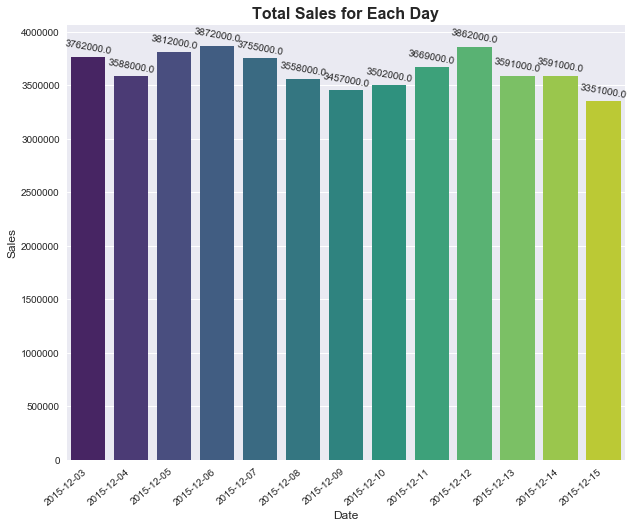

In [23]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=date_sales['Date'],y=date_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=-10)
plt.title('Total Sales for Each Day',fontsize=16,weight='bold')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)

## 7. Managers with the highest Sales

In [24]:
branch_data=pd.read_excel(r'Branch-Data.xlsx' ,sheet_name='Branch Data')
branch_data

,Branch,Longitude,Lattitude,Manager
0,Ibadan,3.916700,7.396400,Adamu Sule
1,Ikoyi,3.433300,6.450000,Kasumu Joe
2,Lekki,4.116700,6.500000,Ifeoma Joseph
3,Gbagada,3.384247,6.561638,Michael Slate
4,Surulere,3.350000,6.500000,Dupe Ishola


In [25]:
managers = {'Ibadan':'Adamu Sule','Ikoyi':'Kasumu Joe','Lekki':'Ifeoma Joseph','Gbagada':'Michael Slate','Surulere':'Dupe Ishola'}

In [26]:
df['Managers'] = df['Branch'].map(managers)

In [27]:
managers_sales=df.groupby('Managers')['Sales'].sum()

In [28]:
managers_sales

Managers
Adamu Sule       9451000
Dupe Ishola      8971000
Ifeoma Joseph    9333000
Kasumu Joe       9835000
Michael Slate    9780000
Name: Sales, dtype: int64

Text(0.5, 1.0, 'Managers with the Highest Sales')

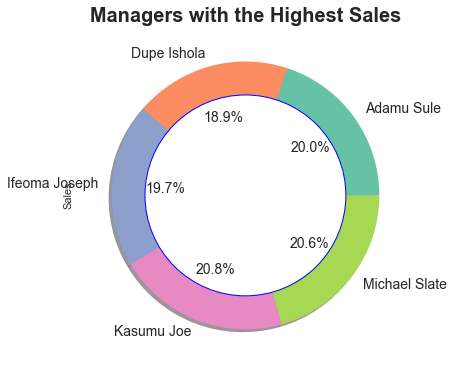

In [29]:
fig=plt.figure(figsize=(6,7))
managers_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=14,colors=sns.color_palette('Set2'))
circle = plt.Circle((0,0),0.75,color='blue',fc='white',lw=1)
plt.gca().add_artist(circle)
plt.title('Managers with the Highest Sales',fontsize=20,weight='bold')

## 8. How many Quantities were sold on each day at Each Branch?

### At Ibadan Branch

In [30]:
ibadan = df[df['Branch']=='Ibadan']

In [31]:
Ibadan = ibadan.groupby('Date')['Quantity'].sum().reset_index()

Text(0.5, 0, 'Date')

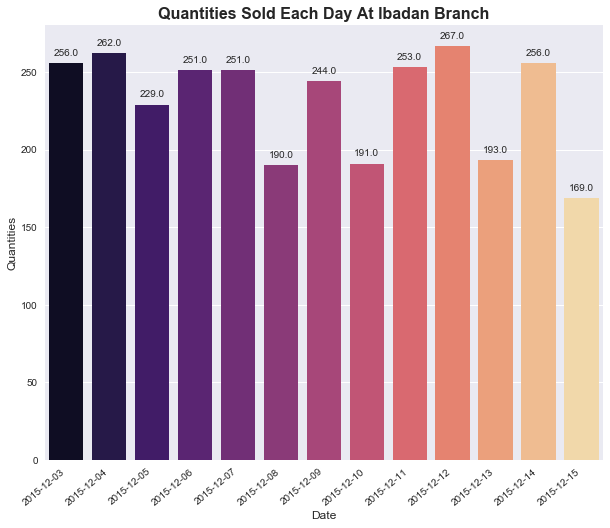

In [32]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(y=Ibadan['Quantity'],x=Ibadan['Date'],palette='magma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Quantities Sold Each Day At Ibadan Branch',fontsize=16,weight='bold') 
plt.ylabel('Quantities',fontsize=12)
plt.xlabel('Date',fontsize=12)

### At Ikoyi Branch

In [33]:
ikoyi = df[df['Branch']=='Ikoyi']

In [34]:
Ikoyi = ikoyi.groupby('Date')['Quantity'].sum().reset_index()

Text(0.5, 0, 'Date')

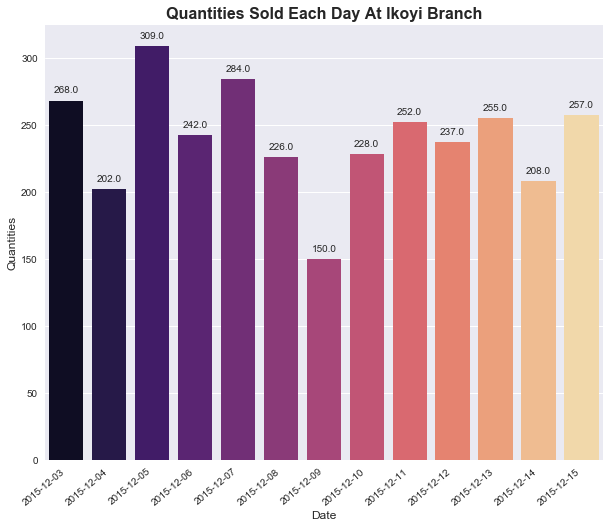

In [35]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(y=Ikoyi['Quantity'],x=Ikoyi['Date'],palette='magma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Quantities Sold Each Day At Ikoyi Branch',fontsize=16,weight='bold') 
plt.ylabel('Quantities',fontsize=12)
plt.xlabel('Date',fontsize=12)

### At Lekki Branch

In [36]:
lekki = df[df['Branch']=='Lekki']

In [37]:
Lekki = lekki.groupby('Date')['Quantity'].sum().reset_index()

Text(0.5, 0, 'Date')

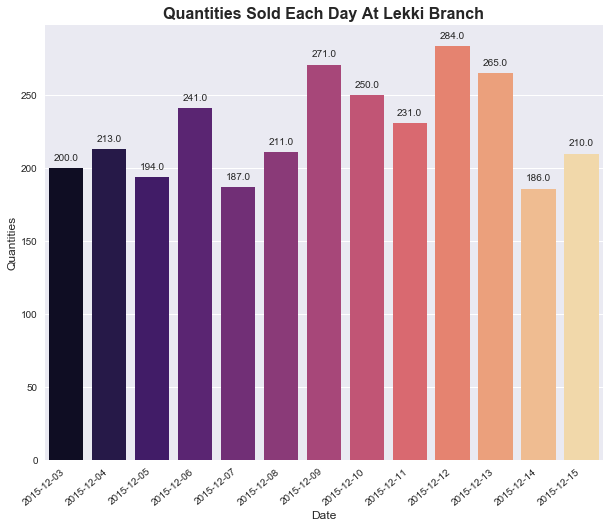

In [38]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(y=Lekki['Quantity'],x=Lekki['Date'],palette='magma')
plt.title('Quantities Sold Each Day At Lekki Branch',fontsize=16,weight='bold') 
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.ylabel('Quantities',fontsize=12)
plt.xlabel('Date',fontsize=12)

### At Gbagada Branch

In [39]:
gbagada = df[df['Branch']=='Gbagada']

In [40]:
Gbagada = gbagada.groupby('Date')['Quantity'].sum().reset_index()

Text(0.5, 0, 'Date')

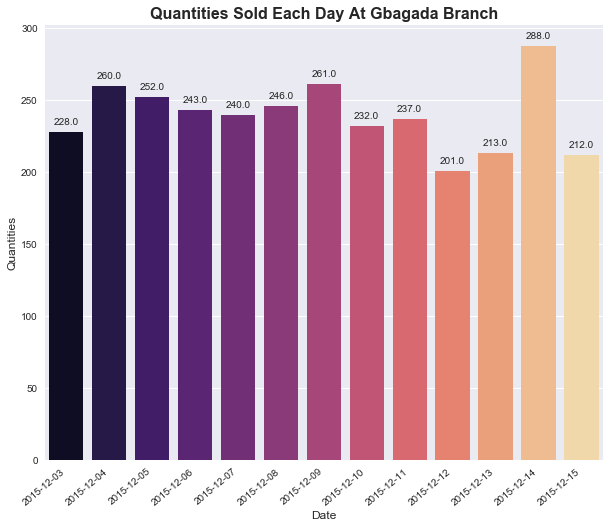

In [41]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(y=Gbagada['Quantity'],x=Gbagada['Date'],palette='magma')
plt.title('Quantities Sold Each Day At Gbagada Branch',fontsize=16,weight='bold') 
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.ylabel('Quantities',fontsize=12)
plt.xlabel('Date',fontsize=12)

### At Surulere Branch

In [42]:
surulere = df[df['Branch']=='Surulere']

In [43]:
Surulere = surulere.groupby('Date')['Quantity'].sum().reset_index()

Text(0.5, 0, 'Date')

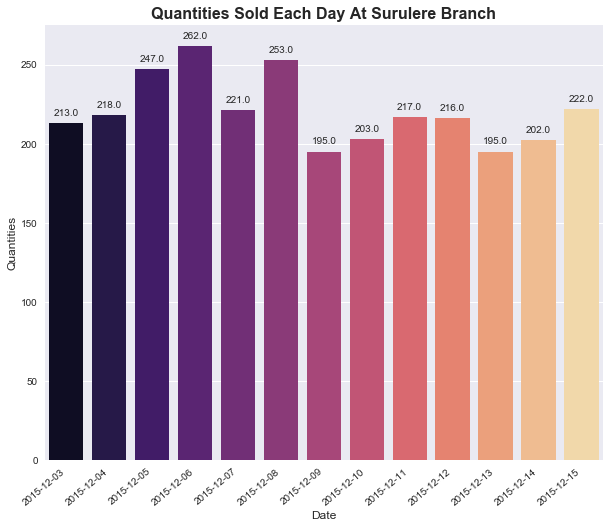

In [44]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(y=Surulere['Quantity'],x=Surulere['Date'],palette='magma')
plt.title('Quantities Sold Each Day At Surulere Branch',fontsize=16,weight='bold') 
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.ylabel('Quantities',fontsize=12)
plt.xlabel('Date',fontsize=12)

##  9. What Type of Pizza was Purchased More Often at Each Branch?

### At Ibadan Branch

In [45]:
ibadan_pizza = ibadan['Pizza Sold'].value_counts()

Text(0.5, 1.0, 'Pizza Purchased At Ibadan Branch')

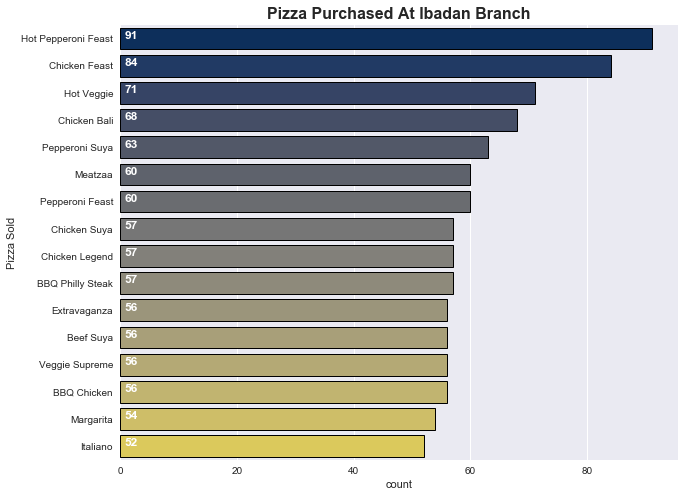

In [46]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(y=ibadan['Pizza Sold'],
                  order=ibadan_pizza.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*ibadan['Pizza Sold'].nunique()
                  )
for x,y in enumerate(ibadan_pizza):
    ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
plt.title('Pizza Purchased At Ibadan Branch',fontsize=16,weight='bold')

### At Ikoyi Branch

In [47]:
ikoyi_pizza = ikoyi['Pizza Sold'].value_counts()

Text(0.5, 1.0, 'Pizza Purchased At Ikoyi Branch')

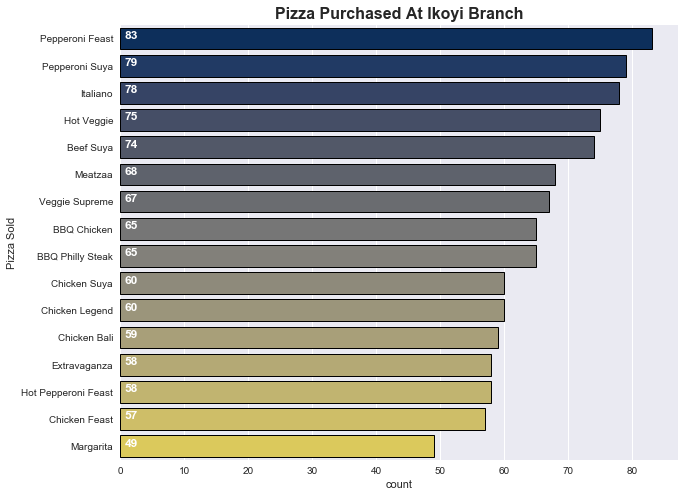

In [48]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(y=ikoyi['Pizza Sold'],
                  order=ikoyi_pizza.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*ikoyi['Pizza Sold'].nunique()
                  )
for x,y in enumerate(ikoyi_pizza):
    ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
plt.title('Pizza Purchased At Ikoyi Branch',fontsize=16,weight='bold')

### At Gbagada Branch

In [49]:
gbagada_pizza = gbagada['Pizza Sold'].value_counts()

Text(0.5, 1.0, 'Pizza Purchased At Gbagada Branch')

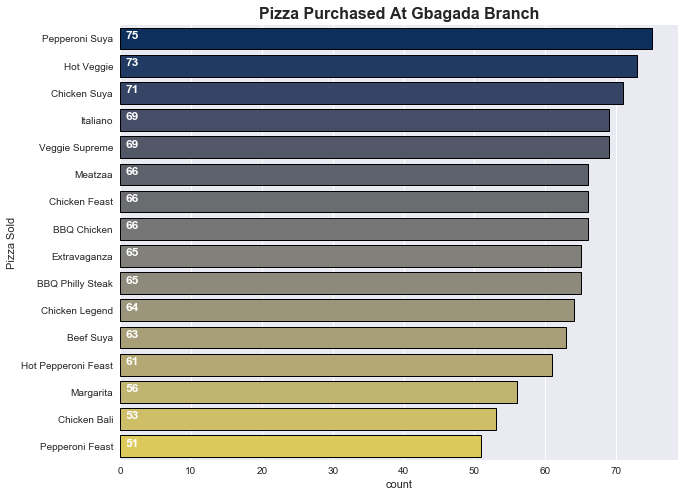

In [50]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(y=gbagada['Pizza Sold'],
                  order=gbagada_pizza.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*gbagada['Pizza Sold'].nunique()
                  )
for x,y in enumerate(gbagada_pizza):
    ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
plt.title('Pizza Purchased At Gbagada Branch',fontsize=16,weight='bold')

### At Lekki Branch

In [51]:
lekki_pizza = lekki['Pizza Sold'].value_counts()

Text(0.5, 1.0, 'Pizza Purchased At Lekki Branch')

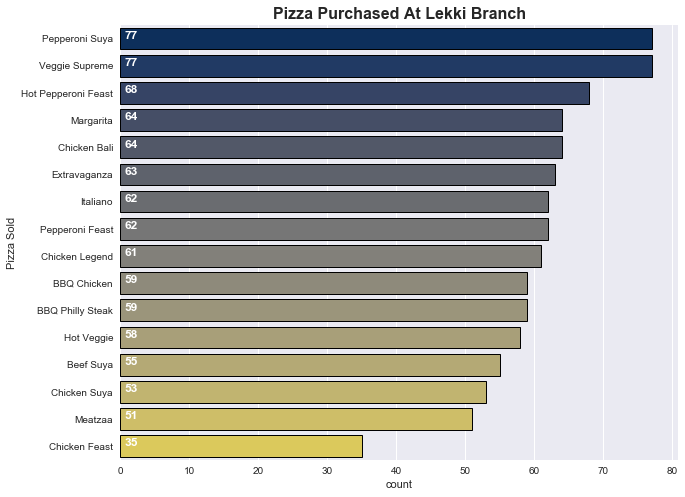

In [52]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(y=lekki['Pizza Sold'],
                  order=lekki_pizza.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*lekki['Pizza Sold'].nunique()
                  )
for x,y in enumerate(lekki_pizza):
    ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
plt.title('Pizza Purchased At Lekki Branch',fontsize=16,weight='bold')

### At Surulere Branch

In [53]:
surulere_pizza = surulere['Pizza Sold'].value_counts()

Text(0.5, 1.0, 'Pizza Purchased At Surulere Branch')

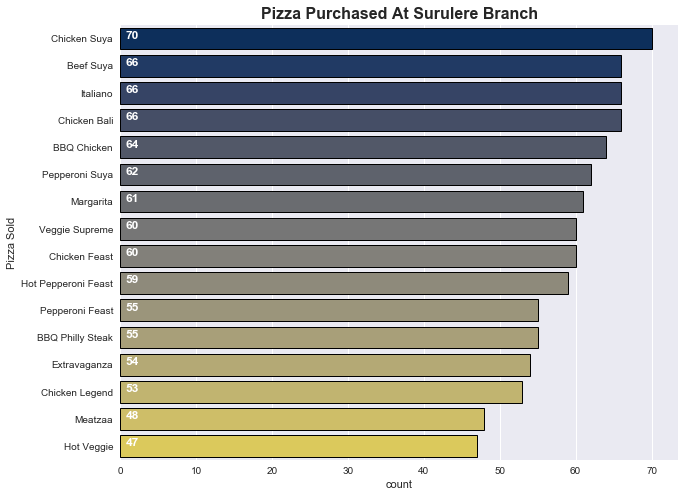

In [54]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(y=surulere['Pizza Sold'],
                  order=surulere_pizza.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*surulere['Pizza Sold'].nunique()
                  )
for x,y in enumerate(surulere_pizza):
    ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
plt.title('Pizza Purchased At Surulere Branch',fontsize=16,weight='bold')

## 10. Total sales for Each Category of Pizza in Each Branch

### At Ibadan Branch

In [55]:
ibcs = ibadan.groupby('Category')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales for each Category of Pizza at Ibadan Branch')

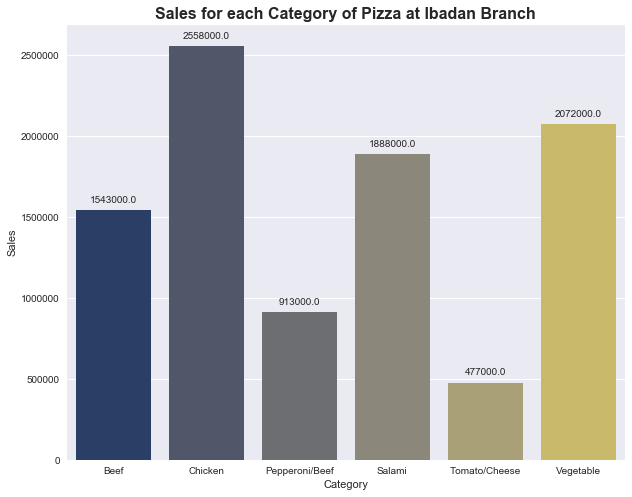

In [56]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(x=ibcs['Category'],y=ibcs['Sales'],palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Sales for each Category of Pizza at Ibadan Branch',fontsize=16,weight='bold')

### At Ikoyi Branch

In [57]:
ikcs = ikoyi.groupby('Category')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales for each Category of Pizza at Ikoyi Branch')

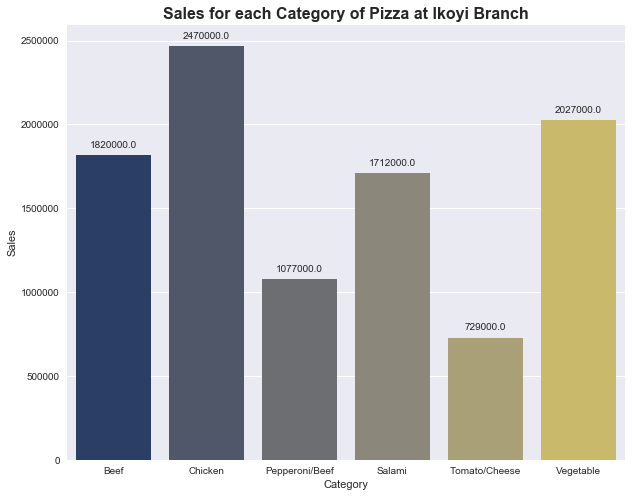

In [58]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(x=ikcs['Category'],y=ikcs['Sales'],palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Sales for each Category of Pizza at Ikoyi Branch',fontsize=16,weight='bold')

### At Gbagada Branch

In [59]:
gcs = gbagada.groupby('Category')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales for each Category of Pizza at Gbagada Branch')

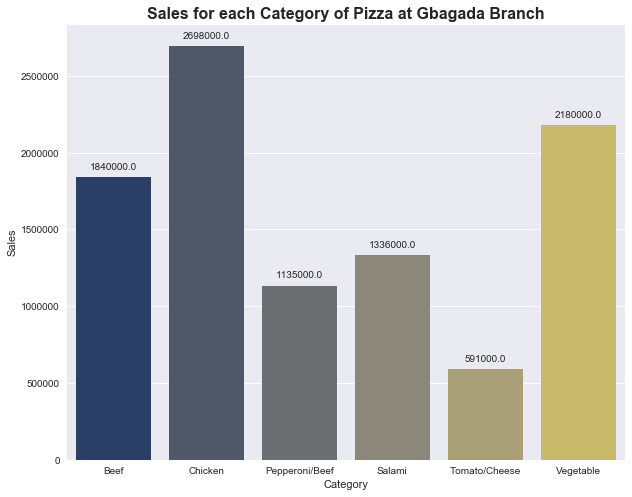

In [60]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(x=gcs['Category'],y=gcs['Sales'],palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Sales for each Category of Pizza at Gbagada Branch',fontsize=16,weight='bold')

### At Lekki Branch

In [61]:
lcs = lekki.groupby('Category')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales for each Category of Pizza at Lekki Branch')

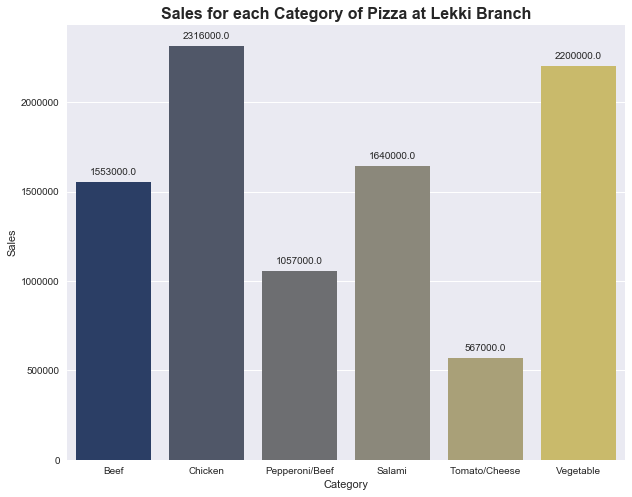

In [62]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(x=lcs['Category'],y=lcs['Sales'],palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Sales for each Category of Pizza at Lekki Branch',fontsize=16,weight='bold')

### At Surulere

In [63]:
scs = surulere.groupby('Category')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales for each Category of Pizza at Surulere Branch')

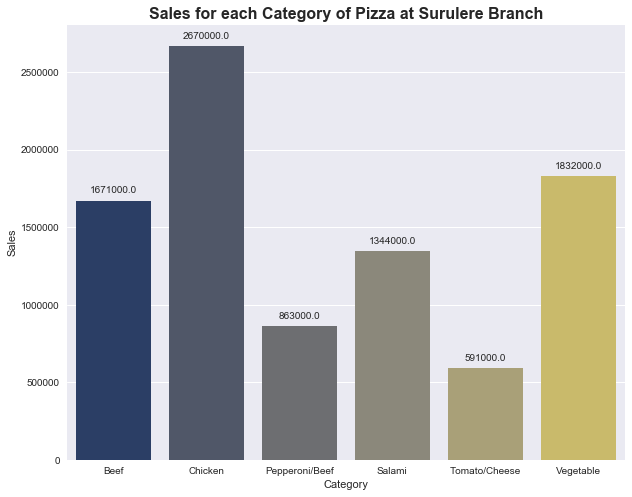

In [64]:
fig=plt.figure(figsize=(10,8))
ax = sns.barplot(x=scs['Category'],y=scs['Sales'],palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Sales for each Category of Pizza at Surulere Branch',fontsize=16,weight='bold')

## 11. Total sales for Pizza Sold in Each Branch

### At Ibadan Branch

In [65]:
ibadan_sales = ibadan.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

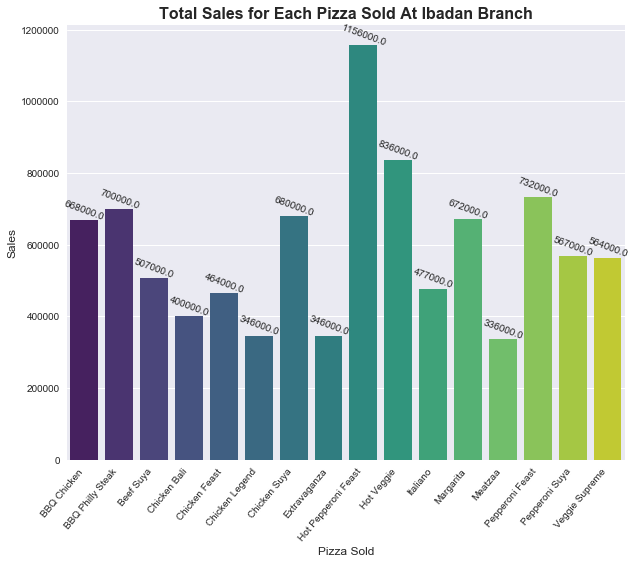

In [66]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=ibadan_sales['Pizza Sold'],y=ibadan_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=-20)
plt.title('Total Sales for Each Pizza Sold At Ibadan Branch',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Ikoyi Branch

In [67]:
ikoyi_sales = ikoyi.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

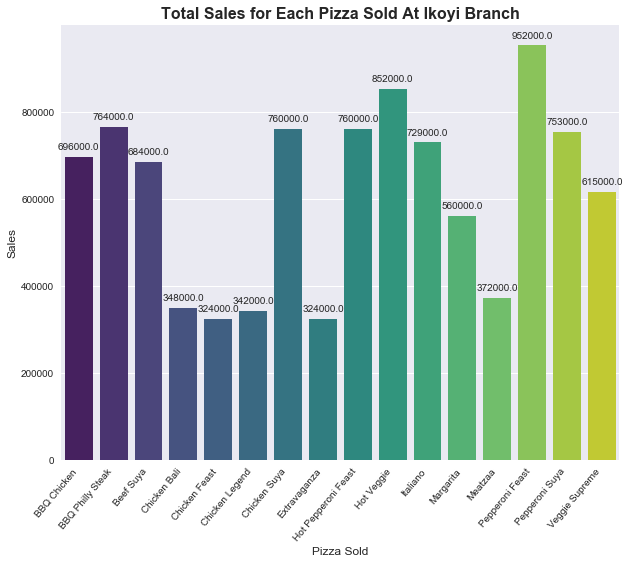

In [68]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=ikoyi_sales['Pizza Sold'],y=ikoyi_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Ikoyi Branch',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Gbagada Branch

In [69]:
gbagada_sales = gbagada.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

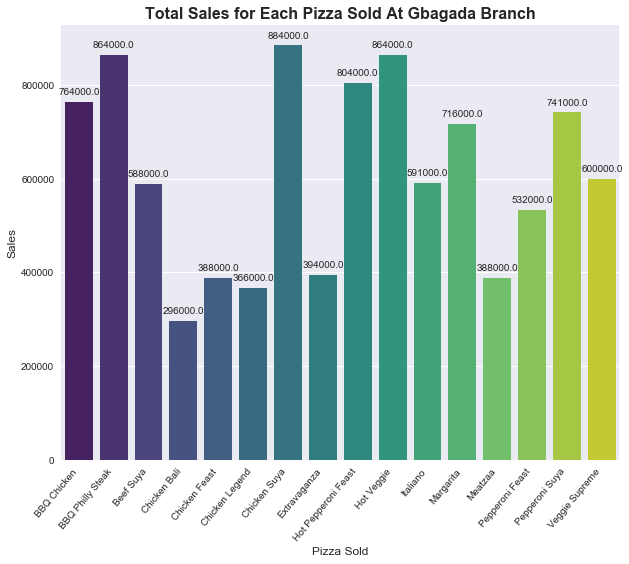

In [70]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=gbagada_sales['Pizza Sold'],y=gbagada_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Gbagada Branch',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Lekki Branch

In [71]:
lekki_sales = lekki.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

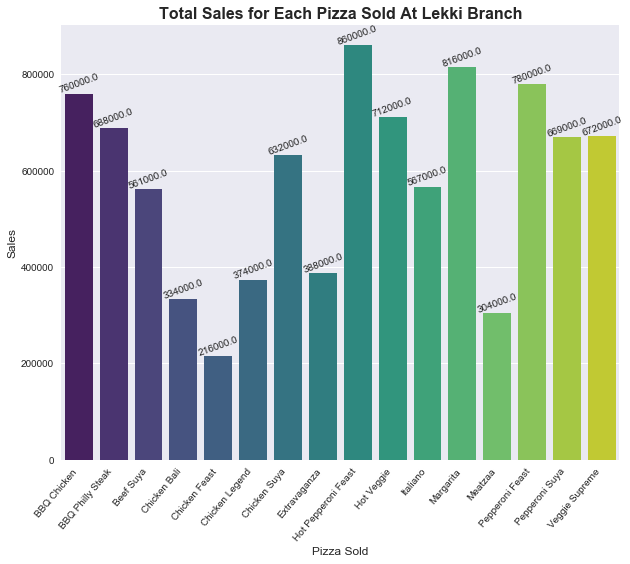

In [72]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=lekki_sales['Pizza Sold'],y=lekki_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=20)
plt.title('Total Sales for Each Pizza Sold At Lekki Branch',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Surulere Branch

In [73]:
surulere_sales = surulere.groupby('Pizza Sold')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

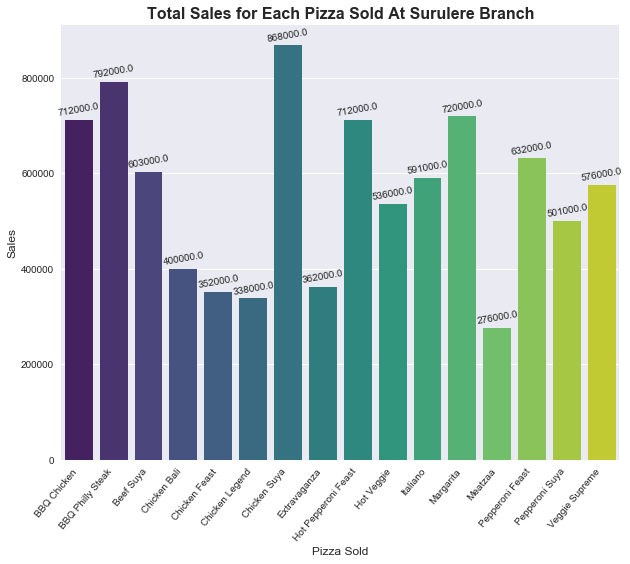

In [74]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=surulere_sales['Pizza Sold'],y=surulere_sales['Sales'], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=10)
plt.title('Total Sales for Each Pizza Sold At Surulere Branch',fontsize=16,weight='bold')
plt.xlabel('Pizza Sold',fontsize=12)
plt.ylabel('Sales',fontsize=12)

## 12. Total sales For Each Date In Each Branch

### At Ibadan Branch

In [75]:
sales_per_day = ibadan.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

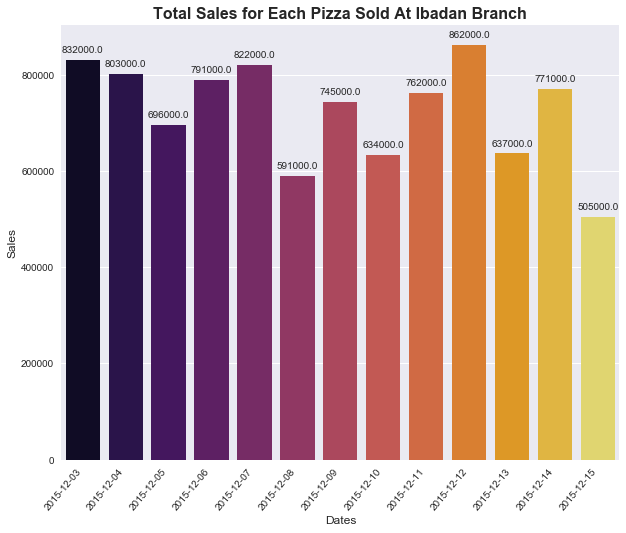

In [76]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=sales_per_day['Date'],y=sales_per_day['Sales'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Ibadan Branch',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Ikoyi Branch

In [77]:
sales_per_day = ikoyi.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

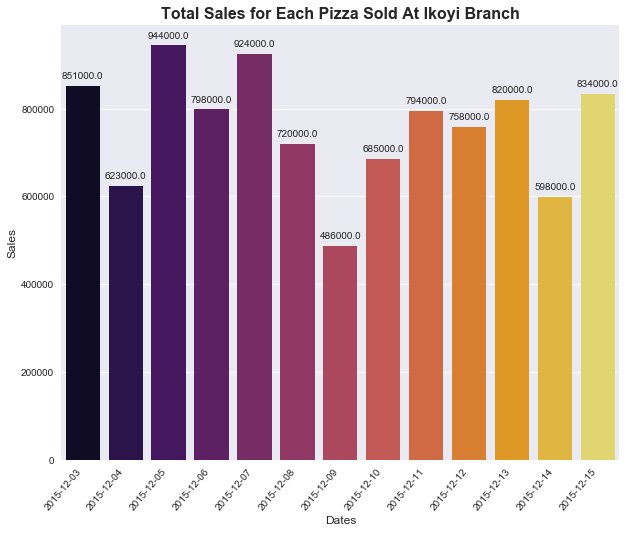

In [78]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=sales_per_day['Date'],y=sales_per_day['Sales'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Ikoyi Branch',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Gbagada Branch

In [79]:
sales_per_day = gbagada.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

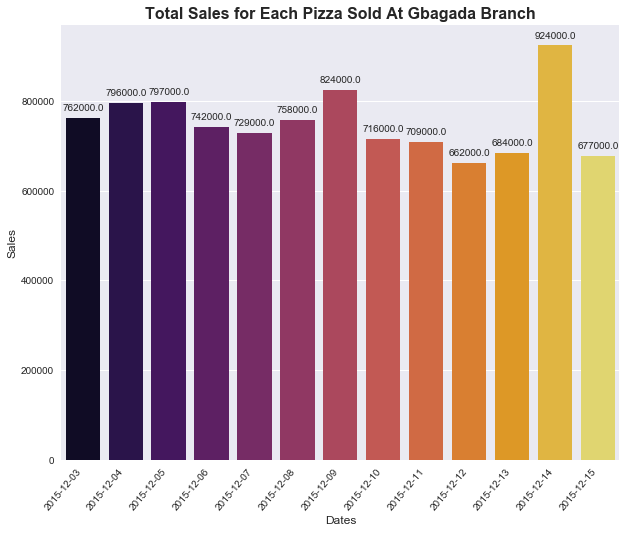

In [80]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=sales_per_day['Date'],y=sales_per_day['Sales'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Gbagada Branch',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Lekki Branch

In [81]:
sales_per_day = lekki.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

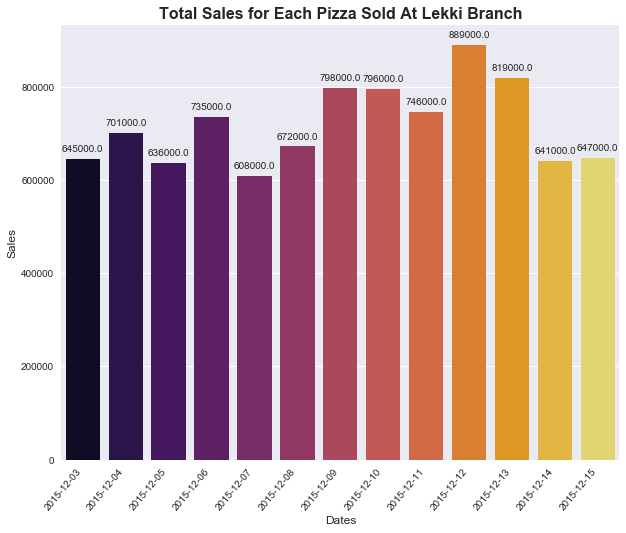

In [82]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=sales_per_day['Date'],y=sales_per_day['Sales'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Lekki Branch',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### At Surulere Branch

In [83]:
sales_per_day = surulere.groupby('Date')['Sales'].sum().reset_index()

Text(0, 0.5, 'Sales')

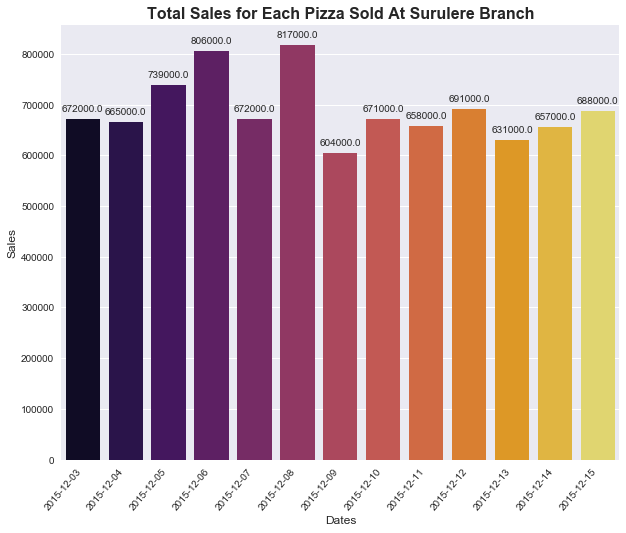

In [84]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x=sales_per_day['Date'],y=sales_per_day['Sales'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'1.1f'),(p.get_x() + p.get_width()/2.,p.get_height())
                ,ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Total Sales for Each Pizza Sold At Surulere Branch',fontsize=16,weight='bold')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Sales',fontsize=12)

In [85]:
df

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range,Sales,Managers
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,08:00:01,Before 9:00am,10000,Adamu Sule
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,08:00:02,Before 9:00am,8000,Kasumu Joe
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,08:00:04,Before 9:00am,20000,Ifeoma Joseph
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,08:00:07,Before 9:00am,2000,Kasumu Joe
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,08:00:08,Before 9:00am,8000,Michael Slate
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2015-12-13,Lekki,Margarita,Vegetable,4000,1,09:42:28,After 9:00am,4000,Ifeoma Joseph
4996,4997,2015-12-07,Surulere,Beef Suya,Beef,3000,5,09:42:31,After 9:00am,15000,Dupe Ishola
4997,4998,2015-12-07,Ikoyi,Pepperoni Suya,Pepperoni/Beef,3000,4,09:42:32,After 9:00am,12000,Kasumu Joe
4998,4999,2015-12-08,Gbagada,Italiano,Tomato/Cheese,3000,1,09:42:32,After 9:00am,3000,Michael Slate


# Findings From The Analysis.


I performed analysis on each branch; analysis like, quantities sold per day for each branch, categories and pizza types that was ordered more often and sales generated by the categories and types of pizza in each branch.



### At Ibadan Branch:
On the **12th and 4th of December**, **Ibadan** branch sold more quantities 267 and 262 respectively. Also, on the **12th**, they made N862,000 in sales while **3rd and 4th** followed suit making N832,000 and N822,000 in sales. The types of Pizza odered more often were **Hot Pepperoni Feast, Chicken Feast and Hot Veggie**. However, that was not the cases in the sales made in these types of pizza. **Hot Pepperoni Feast** made more sales, followed by **Hot Veggie**, then **Pepperoni Feast**.

I did more analysis on the prices of each pizza types and I found out that **Pepperoni Feast** cost N4,000 while **Chicken Feast** cost N2,000 for a box of pizza. Sixty(60) quantities of **Pepperoni Feast** and eighty-four(84) quantities of **Chicken Feast** was ordered during this period. (Do the Maths to be sure).

while the categories of pizza that drove more sales was **Chicken** with a total sale of N2,558,000. Followed by **Vegetables** with a total sale of N2,072,000.



### At Ikoyi Branch:
More quantities were sold on the **5th and 7th**, 309 and 284 respectively. Total sales made on each of these dates were N944,000 and N924,000 respectively. Types of pizza ordered more often from highest were **Pepperoni Feast(83), Pepperoni Suya(79), Italiano(78), Hot Veggie(75) and Beef Suya(74)**. 

However, in sales, that was not the case; **Pepperoni Feast(N962,000), Hot Veggie(N852,000), BBQ Philly Steak(N764,000)**, while **Chicken Suya and Hot Pepperoni Feast** made a total sale of N760,000 each. **Pepperoni Suya** that had more quantities only made N753,000 in sales. This is because all other pizza types that made more sales than **Pepperoni Suya** cost N4,000 for a box of pizza while **Pepperoni Suya** cost just N3,000.

The categories of pizza that drove more sales was **Chicken** with a total sale of N2,470,000 while **Vegetables** made N2,027,000 in sales.



### At Gbagaga Branch:
On the **14th, 9th and 4th of December**, **Gbagaga** branch sold 288, 261, and 260 quantities respectively. Also, on the **14th**, they made N924,000 in sales while **9th, 5th and 4th** followed suit making N824,000, N797,000 and N796,000 in sales. The types of Pizza ordered more often were **Pepperoni Suya(75), Hot Veggie(73), and Chicken Suya(71)**. However, that was not the cases in the sales made in these types of pizza. **Chicken Suya(N884,000)** made more sales, followed by **Hot Veggie and BBQ Philly Steak(N864,000)**, then **Hot Pepperoni Feast(N804,000)**.

You would notice **Pepperoni Suya** is not among the top 4 types of pizza that made great sales. This is beacuse it costs just N3,000 for a box of pizza.

while the categories of pizza that drove more sales was **Chicken** with a total sale of N2,698,000. Followed by **Vegetables** with a total sale of N2,180,000.



### At Lekki Branch
Top 3 dates that sold more quantities were; **12th, 9th and 13th**. Quantities sold were 284, 271, and 265 respectively. Total sales made on **12th and 13th** were N889,000 and N819,000 respectively. However, on the **9th** the sales(N798,000) were low compared to the quantities sold, this is due to the prices of different types of pizza purchased. Types of pizza ordered more often from highest were **Pepperoni Suya(77), Veggie Supreme(77), and Hot Pepperoni Feast(68).

Althouhgh, that was not the case in sales; **Hot Pepperoni Feast(N860,000), Margarita(N816,000), Pepperoni Feast(N780,000)**. **Pepperoni Suya and Veggie Supreme** that had more quantities only made N669,000  and N672,000 respectively in sales. This is because all other pizza types that made more sales than **Pepperoni Suya and Veggie Supreme** cost N4,000 for a box of pizza while **Pepperoni Suya and Veggie Supreme** cost just N3,000 each for a box of pizza.

The categories of pizza that drove more sales was **Chicken** with a total sale of N2,316,000 while **Vegetables** made N2,200,000 in sales. However, there's little difference in sales bewteen this two categories in this branch this is beacause there was a high sale for **Margarita** pizza.Most times people who order **Margarita** preferred **Vegetables** as the category(I think we have more people that love vegetables in that location).



### At Surulere Branch
On the **6th, 8th and 5th of December**, **Surulere** branch sold more quantities 262,253 and 247 respectively. Also, on the **8th**, they made N817,000 in sales while **6th and 5th** followed suit making N806,000 and N739,000 in sales. The types of Pizza odered more often were **Chicken Suya(70), Chicken Bali,Beef Suya, and Italiano(66 quantities each), and BBQ Chicken(64)**. **Chicken Suya** made N868,000 in sales, followed by **BBQ Philly Steak(N792,000), BBQ Chicken and Hot Pepperoni Feast** made N712,000 each in sales.

However, from the visualization you would notice that **Chicken Bali,Beef Suya, and Italiano** are not in top 7 of pizza types that drove sales despite been ordered often. Again this is due to the prices of these pizzas**Chicken Bali** cost N2,000, **Beef Suya** cost N3,000 while **Italiano** cost N3,000 for a box of pizza.

while the categories of pizza that drove more sales was **Chicken** with a total sale of N2,670,000. Followed by **Vegetables** with a total sale of N1,832,000.


### In General:

1. On the **5th and 6th of December 2015**, Dominos Pizza sold 1,231 and 1,239 quantities of pizza respectively which happens to be the highest quantities sold on any day during this period. Also on the **11th and 12th of the same month**, quantities of pizza sold was 1,119 and 1,205 respectively. However, there was no day during this period in which they sold less than a thousand quantities.


2. **Ikoyi, Gbagada*, and *Ibadan** Branch were the top three branches that sold more qunatities of pizza. **Ikoyi** sold 3,118, **Gbagada** sold 3,113 and **Ibadan** sold 3,012. **Lekki and Surulere** Branch sold less than 3,000 quantities each.


3. It didn't come as a surprise that **Chicken** under the category of pizza was purchased more, With a total sale of N12,712,000  across all branches. The category of pizza that performed well in sales after **Chicken** was **Vegetables**(lol...this came as a surpise to me tho) with total sales of N10,311,000. However, **Tomato/Cheese** was the lowest with total sales of N2,955,000 across all branches.


4. Domino sold different types of pizzas during this period, they were: **Pepperoni Suya, Hot Pepperoni Feast, Veggie Supreme,  Italiano, Hot Veggie, Beef Suya, Chicken Suya, Pepperoni Feast, Chicken Bali, BBQ Chicken, Chicken Feast, BBQ Philly Steak, Extravaganza, Chicken Legend, Meatzaa, and Margarita**.
    
    My Favourite is the **Chicken Suya**. Although, **Hot Pepperoni Feast** had the highest sales with N4,292,000. Followed by the **Chicken Suya**, **BBQ Philly Steak**, and the **Hot Veggie** with total sales of N3,824,000, N3,808,000 and N3,800,000 respectively. 
    
    All types of pizza with **"chicken"** did really poor in sales expect **Chicken Suya**. **Meatzaa** had the lowest sales across all branches with a total sale of N1,676,000.
    
    
5. It shouldn't come as a surprise that **Ikoyi** branch had the Highest sale amongst the other branches with a total sale of N9,835,000. This is because they sold more quantities of pizza. **Gbagada and Ibadan** made N9,780,000 and N9,451,000 in sales respectively. 


6. Surprisingly, quantities sold across all branches on the **12th of December** was 1,205. However , on this same day a total sale across all branches was N3,862,000. But quantities sold on the **5th of December** was 1,231 had a total sale of N3,812,000.
    
    Although, on the **6th of December 2015**, quantities sold in all branches was 1,239 and on this same day, a total sale of N3,872,000 was made across all branches.
    
### Branches and their Managers   
 
|Branch   |Managers   |
|----:|:----:|
| Ibadan | Adamu Sule |
| Ikoyi | Kasumu Joe |
| Lekki | Ifeoma Joseph |
| Gbagada | Michael Slate |
| Surulere | Dupe Ishola |


From our branch with the highest sales, we can map the analysis with the respective managers to know the manager with the highest sales. **Kasumu Joe** the branch Manager from **Ikoyi branch** had the highest sale, followed by **Michael Slate of Gbagada branch** and **Adamu Sule of Ibadan branch**.

## Thank You for viewing!!!
